In [12]:
# Import libraries in Python
import pandas as pd #using `pandas` for dataframe manipulation
import numpy as np #using `numpy` for arrary
import matplotlib.pyplot as plt #using `matplotlib` for the final bar graph
from datetime import datetime #using `datetime` for report 3, subtracting time values

In [13]:
# Read excel to dataframe `data`
df = pd.read_excel("ABS Example.xlsx",sheet_name=
                   "Data", na_values=["NA"]) 

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   LOAN_NUMBER                   2000 non-null   int64         
 1   SAMPLE_DATE                   2000 non-null   datetime64[ns]
 2   FILE_REQ_DATE                 1930 non-null   datetime64[ns]
 3   SECOND_REQUEST_DATE           232 non-null    datetime64[ns]
 4   SENT_TO_IMAGING_DATE          1352 non-null   datetime64[ns]
 5   LENDER_RESPONSE_DUE_DATE      112 non-null    datetime64[ns]
 6   DATE_LOAN_FINALIZED           1803 non-null   datetime64[ns]
 7   LENDER_ID                     2000 non-null   object        
 8   LENDER_NAME                   2000 non-null   object        
 9   LENDER_LOAN_ID                1924 non-null   object        
 10  PROP_STATE                    2000 non-null   object        
 11  NEW_CONSTRUCTION_INDICATOR    

In [24]:
# Populate first few rows
df.head(2) 

,LOAN_NUMBER,SAMPLE_DATE,FILE_REQ_DATE,SECOND_REQUEST_DATE,SENT_TO_IMAGING_DATE,LENDER_RESPONSE_DUE_DATE,DATE_LOAN_FINALIZED,LENDER_ID,LENDER_NAME,LENDER_LOAN_ID,...,LENDER_INST_TYPE_DESCRIPTION,UNDERWRITER_NAME,REVIEW_DATE,REVIEW_STATUS,DEAL_NAME,START_DATE,LTV_Category,loan age,loan_age_category,FICO_SCORE_category
0,19457569,2010-11-22,2010-11-25,NaT,NaT,NaT,2011-01-24,ZMFHQJ,"Wells Fargo Bank, N.A.",26291118,...,Bank Owned Mortgage Company - National,Mike Willams,2011-01-13,4.0,WFMBS 2006-5,2013-06-01,>85% and <= 90%,34.0,29-39,<600
1,16864087,2012-04-03,2012-04-05,2012-04-20,NaT,NaT,2012-04-24,NXYFBZ,"Wells Fargo Bank, N.A.",381247287,...,Bank Owned Mortgage Company - National,Mike Willams,2012-04-23,4.0,WFMBS 2006-AR4,2013-06-01,<=80%,20.0,19-29,600-699


# Report 1

In [15]:
# REPORT 1
r_1 = df.groupby(by = ['LENDER_INST_TYPE_DESCRIPTION'])['CURRENT_BALANCE'].agg(['count','mean', 'max', 'min'])

counts, means, max_values, min_values = df['LENDER_INST_TYPE_DESCRIPTION'].count(), r_1.mean(), r_1.max(), r_1.min()

r_1.loc['Total'] = [counts,means['mean'], max_values['max'], min_values['min']]

r_1

,count,mean,max,min
LENDER_INST_TYPE_DESCRIPTION,,,,
Bank Owned Mortgage Company - National,187.0,242899.802139,720000.0,43225.0
Community Banks,499.0,211839.963928,729750.0,28500.0
Credit Unions,374.0,175149.601604,578250.0,22500.0
Mortgage Banker - (Large),279.0,260374.383513,729750.0,59000.0
Mortgage Banker - Bank Owned,661.0,236262.689864,625500.0,25018.0
Total,2000.0,225305.288210,729750.0,22500.0


# Report 2

In [16]:
# list all cuts
bins = [0, 85, 90, 95, 100]

# Use the cut function to convert the LTV column to a categorical variable
df['LTV_Category'] = pd.cut(df['LTV'], bins, labels=
                            ['<=80%','>85% and <= 90%','>90% and <= 95%','> 95%'])

# 
r_2 = df.groupby(by = ['LTV_Category'])['CURRENT_BALANCE'].agg(['count','mean', 'max', 'min'])

counts, means, max_values, min_values = df['LENDER_INST_TYPE_DESCRIPTION'].count(), r_2.mean(), r_2.max(), r_2.min()

r_2.loc['Total'] = [counts,means['mean'], max_values['max'], min_values['min']]

r_2

,count,mean,max,min
LTV_Category,,,,
<=80%,344.0,223985.912791,729750.0,43300.0
>85% and <= 90%,823.0,235966.178615,729750.0,22500.0
>90% and <= 95%,796.0,209504.335427,561700.0,28500.0
> 95%,37.0,200910.189189,371510.0,65475.0
Total,2000.0,217591.654005,729750.0,22500.0


# Report 3

In [17]:
# Report 3
df['loan age'] = ((df.START_DATE.dt.year - df.LOAN_ORIG_DATE.dt.year) * 12 +
                  (df.START_DATE.dt.month - df.LOAN_ORIG_DATE.dt.month))

# List all cuts
bins = np.array([0, 9, 19, 29, 39, 80], dtype='float64')

# Use the cut function to convert the age column to a categorical variable
df['loan_age_category'] = pd.cut(df['loan age'],bins,labels=
                                     ['0-9', '9-19', '19-29', '29-39', '39-80'])

# 
r_3 = df.groupby(by = ['loan_age_category'])['CURRENT_BALANCE'].agg(['count','mean', 'max', 'min'])

counts, means, max_values, min_values = df['LENDER_INST_TYPE_DESCRIPTION'].count(), r_3.mean(), r_3.max(), r_3.min()

r_3.loc['Total'] = [counts,means['mean'], max_values['max'], min_values['min']]

r_3


,count,mean,max,min
loan_age_category,,,,
0-9,242.0,233615.673554,562500.0,45000.0
9-19,724.0,229611.947514,720000.0,25018.0
19-29,564.0,216680.785461,729750.0,22500.0
29-39,268.0,204076.171642,546376.0,41705.0
39-80,186.0,224049.580645,729750.0,35000.0
Total,2000.0,221606.831763,729750.0,22500.0


In [18]:
# Extract NaT values 
df['LOAN_ORIG_DATE'] = pd.to_datetime(df['LOAN_ORIG_DATE'])
nat_values = df[df['LOAN_ORIG_DATE'].isna()]

nat = nat_values['CURRENT_BALANCE'].agg(['count','mean', 'max', 'min'])
r_3.loc['Unkown'] = nat
r_3 = r_3.reindex(['Unkown'] + list(r_3.index[:-1]))
r_3

,count,mean,max,min
loan_age_category,,,,
Unkown,16.0,256425.312500,404700.0,88065.0
0-9,242.0,233615.673554,562500.0,45000.0
9-19,724.0,229611.947514,720000.0,25018.0
19-29,564.0,216680.785461,729750.0,22500.0
29-39,268.0,204076.171642,546376.0,41705.0
39-80,186.0,224049.580645,729750.0,35000.0
Total,2000.0,221606.831763,729750.0,22500.0


# Report 4

In [19]:
# List all cuts
bins = [0, 600, 699, 799, 900]

# Use the cut function to convert the FICO score column to a categorical variable
df['FICO_SCORE_category'] = pd.cut(df['FICO_SCORE'], bins, labels=
                                     ['<600', '600-699', '699-799', '>=800'])

In [20]:
# Use cross-tabulation to create dataframe
r_4 = pd.crosstab(index=df['FICO_SCORE_category'],columns=
                  df['LTV_Category'],values=df['CURRENT_BALANCE'], aggfunc='sum')

# Populate table `REPORT 4`
r_4

LTV_Category,<=80%,>85% and <= 90%,>90% and <= 95%,> 95%
FICO_SCORE_category,,,,
<600,0,247050,0,0
600-699,3260490,14606019,14598016,629990
699-799,60413630,149979009,135188314,5359114
>=800,13377034,29368087,16979121,1444573


# Report 5

/var/folders/ks/z56lz70d4j9f3grb85rk9q1c0000gn/T/ipykernel_30011/1498971625.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


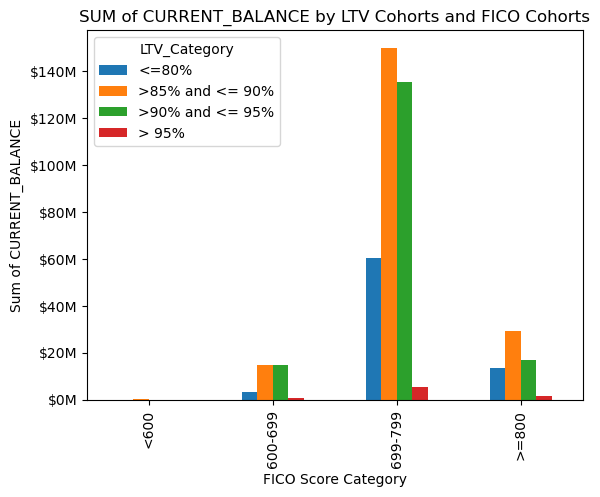

In [21]:
# Plot the bar graph
fig, ax = plt.subplots()
r_4.plot.bar(ax=ax)
plt.title("SUM of CURRENT_BALANCE by LTV Cohorts and FICO Cohorts")
plt.xlabel("FICO Score Category")
plt.ylabel("Sum of CURRENT_BALANCE")

# Change the unit of the y-axis to millions
labels = [f"${x/1000000:.0f}M" for x in ax.get_yticks()]
ax.set_yticklabels(labels)

# Show the bar graph
plt.show()

# Export to Excel

In [22]:
# Create an Excel writer object
writer = pd.ExcelWriter('DataFrame.xlsx', engine='xlsxwriter')

# Write the dataframes to different sheets
r_1.to_excel(writer, sheet_name='Report 1')
r_2.to_excel(writer, sheet_name='Report 2')
r_3.to_excel(writer, sheet_name='Report 3')
r_4.to_excel(writer, sheet_name='Report 4')
df.to_excel(writer, sheet_name='Data')

# Save the Excel file
writer.save()